L'objectif de ce TP est de se familiariser avec python et Scikit-learn afin de découvrir certains modèles et algorithmes de science des données. Le TP contient aussi un certain nombre d'explications succintes de différents concepts importants qui seront revus plus en détails dans le cours. Nous vous encourageons à manipuler autant que possible les extraits de code fournis pour comprendre ce qu'ils recouvrent.

Vous devez répondre aux questions en rouge en créant de nouvelles cellules, texte ou code, contenant vos réponses.

Le TP est extrait du livre "Python Data Science Handbook" de Jake VanderPlas. 

Vous pouvez consulter un tutoriel python sous https://docs.python.org/fr/3/tutorial/



# Using sklearn for building ML models


The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the Scikit-Learn API paper:

* Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

* Inspection: All specified parameter values are exposed as public attributes.

* Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

* Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

* Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.

In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood. Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

## Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

* Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
* Choose model hyperparameters by instantiating this class with desired values.
* Arrange data into a features matrix and target vector following the discussion above.
* Fit the model to your data by calling the fit() method of the model instance.
* Apply the Model to new data:
  * For supervised learning, often we predict labels for unknown data using the predict() method.
  * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

## Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to  (𝑥,𝑦)  data. We will use the following simple data for our regression example:

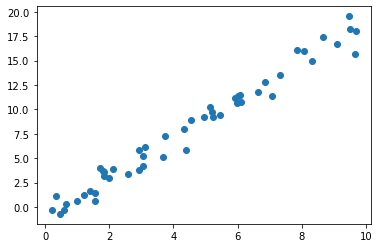

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

<span style="color:red">Quel est le type de x ? de y ? Afficher x et y</span>

Let's now walk through the process of building an ML model

1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class. So, for example, if we would like to compute a simple linear regression model, we can import the linear regression class:

In [2]:
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters

An important point is that a class of model is not the same as an instance of a model.

Once we have decided on our model class, there are still some options open to us. Depending on the model class we are working with, we might need to answer one or more questions like the following:

Would we like to fit for the offset (i.e., y-intercept)?
Would we like the model to be normalized?
Would we like to preprocess our features to add model flexibility?
What degree of regularization would we like to use in our model?
How many model components would we like to use?
These are examples of the important choices that must be made once the model class is selected. These choices are often represented as hyperparameters, or parameters that must be set before the model is fit to data. In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation. We will explore how you can quantitatively motivate the choice of hyperparameters later.

For our linear regression example, we can instantiate the LinearRegression class and specify that we would like to fit the intercept using the fit_intercept hyperparameter:

In [3]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data: the Scikit-Learn API makes very clear the distinction between choice of model and application of model to data

3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [4]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fit the model to your data

Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [5]:
model.fit(X, y)

LinearRegression()

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore. In Scikit-Learn, by convention all model parameters that were learned during the fit() process have trailing underscores; for example in this linear model, we have the following:

In [6]:
model.coef_
model.intercept_

-0.9033107255311164

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [7]:
xfit = np.linspace(-1, 11)

<span style="color:red">Quel est l'effet de linspace ?</span>

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [8]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

<span style="color:red">Quel est l'effet de xfit ? de model.predict ? quel est le type de Xfit ? de yfit ?</span>

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

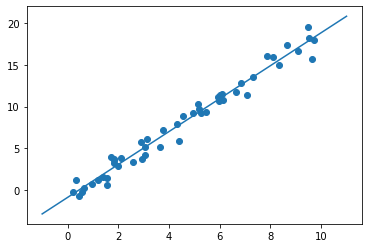

In [9]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised classification: Naive bayes on Iris dataset

Let's take a look at another example of this process, using the Iris dataset we discussed earlier. Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as Gaussian naive Bayes, which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution. Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

We would like to evaluate the model on data it has not seen before, and so we will split the data into a training set and a testing set. This could be done by hand, but it is more convenient to use the train_test_split utility function:

In [10]:
from sklearn.datasets import load_iris
dataset = load_iris()
X_iris = dataset.data
y_iris = dataset.target

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

<span style="color:red">Quelle est l'utilité de random_state ?</span>

With the data arranged, we can follow our recipe to predict the labels.

<span style="color:red">En utilisant le code suivant, apprendre un modèle Naive Bayes (cf. GaussianNB) sur les données Iris et stocker les prédictions faites sur Xtest dans un vecteur que vous appellerez y_model:</span>

<span style="color:green">from sklearn.naive_bayes import GaussianNB # 1. choose model class</span>

<span style="color:green">model = GaussianNB()                       # 2. instantiate model</span>

<span style="color:green">model.fit(Xtrain, ytrain)                  # 3. fit model to data</span>

<span style="color:green">y_model = model.predict(Xtest)             # 4. predict on new data</span>

Finally, we can use the accuracy_score utility to see the fraction of predicted labels that match their true value:

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

NameError: name 'y_model' is not defined

<span style="color:red">À quoi correspond l'accuracy ? Donner une formule et une explication.</span>

<span style="color:red">Quelle est la matrice de confusion du modèle Naive Bayes sur les données Iris ? Ecrire le script permettant le calcul et la visualisation de cette matrice.</span>

<span style="color:red">Reprendre les étapes ci-dessus avec un modèle k-NN (toujours sur les données Iris).</span>

## Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use the k-means algorithm.

<span style="color:red">Charger le jeu de données iris (voir TP k-moyennes/k-means) et utiliser le code k-means de sklearn. Visualiser les résultats (voir TP k-moyennes/k-means).</span>

# Using sklearn to validate ML models and hyperparameters 

In the previous section, we saw the basic recipe for applying a supervised machine learning model:

1. Choose a class of model
2. Choose model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data

The first two pieces of this—the choice of model and choice of hyperparameters—are perhaps the most important part of using these tools and techniques effectively. In order to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data. While this may sound simple, there are some pitfalls that you must avoid to do this effectively.

## Thinking about Model Validation

In principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

The following sections first show a naive approach to model validation and why it fails, before exploring the use of holdout sets and cross-validation for more robust model evaluation.

### Model validation the wrong way

Let's demonstrate the naive approach to validation using the Iris data, which we saw in the previous section. We will start by loading the data:

<span style="color:red">Charger le dataset Iris avec les attributs dans un tableau X et les targets dans un vecteur y.</span>

Next we choose a model and hyperparameters. Here we'll use a k-neighbors classifier with n_neighbors=1. This is a very simple and intuitive model that says "the label of an unknown point is the same as the label of its closest training point:"

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

Then we train the model, and use it to predict labels for data we already know:

In [ ]:
model.fit(X, y)
y_model = model.predict(X)

Finally, we compute the fraction of correctly labeled points:

<span style="color:red">Calculer la précision (accuracy) de la prediction y_model. Quel résultat observe-t-on et pourquoi ?</span>

### Model validation the right way: Holdout sets

So what can be done? A better sense of a model's performance can be found using what's known as a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance. This splitting can be done using the train_test_split utility in Scikit-Learn:

In [ ]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

<span style="color:red">Fitter le modèle sur le premier sous-dataset X1, y1.</span>

<span style="color:red">Prédire les classes sur le 2ème sous-dataset X2, y2 et calculer la précision (accuracy). Qu'oberve-t-on ? Quel est l'effet de random_state ?</span>

Model validation via cross-validation
One disadvantage of using a holdout set for model validation is that we have lost a portion of our data to the model training. In the above case, half the dataset does not contribute to the training of the model! This is not optimal, and can cause problems – especially if the initial set of training data is small.

One way to address this is to use cross-validation; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set. For instance we can two validation trials, alternately using each half of the data as a holdout set. Using the split data from before, we could implement it like this:

In [ ]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance. This particular form of cross-validation is a two-fold cross-validation—that is, one in which we have split the data into two sets and used each in turn as a validation set.

We could expand on this idea to use even more trials, and more folds in the data—for example we can split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data. This would be rather tedious to do by hand, and so we can use Scikit-Learn's cross_val_score convenience routine to do it succinctly:

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of useful cross-validation schemes that are useful in particular situations; these are implemented via iterators in the cross_validation module. For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross validation, and can be used as follows:

In [ ]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())

<span style="color:red">Quel est la forme du résultat scores et pourquoi ? Calculer la moyenne.</span>

## Selecting the Best Model

Now that we've seen the basics of validation and cross-validation, we will go into a litte more depth regarding model selection and selection of hyperparameters. These issues are some of the most important aspects of the practice of machine learning.

Of core importance is the following question: if our estimator is underperforming, how should we move forward? There are several possible answers:

* Use a more complicated/more flexible model
* Use a less complicated/less flexible model
* Gather more training samples
* Gather more data to add features to each sample

The answer to this question is often counter-intuitive. In particular, sometimes using a more complicated model will give worse results, and adding more training samples may not improve your results! The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.

### Validation curve

Dans la suite, nous présentons une façon d'évaluer la meilleure complixité de modèle à choisir

If we imagine that we have some ability to tune the model complexity, we would expect the training score and validation score to behave as illustrated in [this figure](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.03-validation-curve.png)

The diagram shown here is often called a *validation curve*, and we see the following essential features:

- The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
- For very low model complexity (a high-bias model), the training data is under-fit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
- For very high model complexity (a high-variance model), the training data is over-fit, which means that the model predicts the training data very well, but fails for any previously unseen data.
- For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

The means of tuning the model complexity varies from model to model; when we discuss individual models in depth in later sections, we will see how each model allows for such tuning.

### Validation curves in Scikit-Learn

Let's look at an example of using cross-validation to compute the validation curve for a class of models.
Here we will use a *polynomial regression* model: this is a generalized linear model in which the degree of the polynomial is a tunable parameter.
For example, a degree-1 polynomial fits a straight line to the data; for model parameters $a$ and $b$:

$$
y = ax + b
$$

A degree-3 polynomial fits a cubic curve to the data; for model parameters $a, b, c, d$:

$$
y = ax^3 + bx^2 + cx + d
$$

We can generalize this to any number of polynomial features.
In Scikit-Learn, we can implement this with a simple linear regression combined with the polynomial preprocessor.
We will use a *pipeline* to string these operations together:

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

<span style="color:red">Quel est l'effet de PolynomialRegression ? Quel est l'effet de kwargs ?</span>

Now let's create some data to which we will fit our model:

In [23]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

We can now visualize our data, along with polynomial fits of several degrees:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

<span style="color:red">Tracer des modèles avec des degrés de polynomes croissants. Qu'observe-t-on et pourquoi ?</span>

The knob controlling model complexity in this case is the degree of the polynomial, which can be any non-negative integer. A useful question to answer is this: what is a good degree of polynomial?

We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and validation score across the range:

In [ ]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

<span style="color:red">Retrouve-t-on le résultat qualitatif attendu ?</span>

<span style="color:red">Quel est le meilleur degré de polynôme à utiliser ? Tracer le dataset avec le modèle de degré correspondant.</span>

<span style="color:red">Recommencez l'étude en modifiant la taille du dataset. Comment varient les résultat ?</span>